En el script anterior, hemos cubierto al modelo de regresion logística simple, que corresponde a tener un modelo con dos niveles en nuestra variable objetivo "Y". 

En el script de hoy, importaremos una base enfocada a resolver un problema de clasificación multinomial en el cual ahondaremos en los conceptos de la Regresión Logística y lo aplicaremos a un caso práctico de empresa que nos dará la ventaja de tener interpretaciones de coeficientes mucho más significativas que en el problema anterior que sólo cubrió un cambio de variable de pendiente.

Comencemos!

# La Regresión logística Multinomial


La regresión logística multinomial es similar a la regresión logística pero con la diferencia de que la variable dependiente  puede tener más de dos niveles, es decir, es multiclase o policotómica.

Este modelo, tiene varios nombres, es así que lo podrán encontrar como regresión logística multiclase, regresión softmax, regresión logística politómica, logit multinomial, clasificador de entropía máxima (MaxEnt) y modelo de entropía máxima condicional.

Al igual que con otros tipos de regresión, la regresión logística multinomial puede tener variables independientes nominales y/o continuas y puede tener interacciones entre variables independientes para predecir la variable dependiente.



_Nota No. 1: Si bien hemos mencionado que la variable objetivo tiene que ser categórica tanto en el modelo de Regresión Logística simple como en el multinomial, es importante mencionar que nos referimos a variables que tengan niveles, pero que no sean significativos. En otras palabras, la variable objetivo no puede presentar clases que puedan ser ordenadas._

Me pueden dar ejemplos de variables categóricas con más de dos niveles?

En sí, la diferencia en el modelo de regresión logística normal y el del modelo de regresión logística multinomial radica que a más de contar con una variable multiclase en nuestra variable dependiente "Y", la función que transforma las probabilidades es diferente, así:

- En la regresión logística, la función con la que modelábamos y calculábamos las las probabilidades de los dos resultados posibles era la función sigmoidea
- En la regresión logística multinomial, la función es la función Softmax, razón por la cuál algunas veces este modelo se conoce como Regresión Softmax

## Definición matemática del modelo

Al ajustar un modelo de regresión logística multinomial, lo que ocurre tras cámaras es que el problema se puede pensar como el ajuste de k-1 modelos logit binarios independientes, donde uno de los posibles resultados se define como pivot, y los resultados k-1 se regresan frente al resultado pivot.

Recordemos que partíamos de la siguiente ecuación:

$$logit(p)= log (o d d s)=\operatorname{logit}(Y)=\ln \left(\frac{p}{1-p}\right)=\hat \beta_0+\hat \beta_{1}X_1+.... \hat \beta_{n}X_n+\underbrace{\epsilon}_{error}$$


Donde:

    - p: Es la probabilidad de pertenecer a una clase
    - e: corresponde al "exponencial" que es aproximadamente 2.72
    - 𝛽̂ 0 es la constante de la ecuación
    - y los demás betas corresponden al coeficiente de cada variable independiente
    

Ahora si tomamos como referencia la clase k y obtenemos la siguiente relación:

$$ ln(\frac{{prob(Y_i=1 )}}{{prob(Y_i=k )}})=\hat \beta_{1}X_1$$

$$ ln(\frac{{prob(Y_i=2 )}}{{prob(Y_i=k )}})=\hat \beta_{2}X_2$$

$$ ... $$

$$ ln(\frac{{prob(Y_i=k-1 )}}{{prob(Y_i=k )}})=\hat \beta_{k-1}X_k-1$$

Aplicando exponenciales para eliminar el logaritmo a mano derecha obtenemos:


    

$$prob(Y_i=1)={prob(Y_i=k)*e^{(\hat \beta_{1}X_1)}}$$

$$prob(Y_i=2)={prob(Y_i=k)*e^{(\hat \beta_{2}X_1)}}$$

$$ ... $$

$$prob(Y_i=k-1)={prob(Y_i=k)*e^{(\hat \beta_{k-1}X_k-1)}}$$

De el desgloce de fórmulas precedente, psi tuviésemos tres categorías (clase 1, clase 2, y clase 3), el análisis de la regresión logística multinomial consiste en:

- Comparar todo con la primera categoría: Clase 1 vs. Calse 2 y Clase 1 vs. Clase 3


## La función Softmax

Es importate mencionar que la función sigmoidea, tenía un umbral de probabilidad de 0,5, donde las observaciones con una probabilidad por debajo de ese umbral entraban a la clase 0, y aquellas con una probabilidad por encima del umbral entran en la clase 1. En consecuencia, esta función estaba reservado para una predicción entre dos clases.

Como en la regresión multinomial tenemos que clasificar para más de dos clases, requerimos de una función que devuelva un valor de probabilidad para cada clase, en donde la suma agregada de todas las probabilidades sume uno. 

La función softmax se adapta a estos requisitos.

La función logística venía dada por σ(x) o sig(x):


$$σ(x) = \frac{1}{1+e^{-x}}$$

Mientras que la función softmax es expresada como:

$$softmax(x_i) = \frac{e^{x_j}}{\sum_{j=1}^{n} e^{x_j}}$$

Donde:

    - Xi: Es el vector de variables explicativas con longitud equivalente al número de clases k
    - denominador corresponde al término de normalización que asegura que todos los valores de salida de la función sumen 1, constituyendo así una distribución de probabilidad válida
    

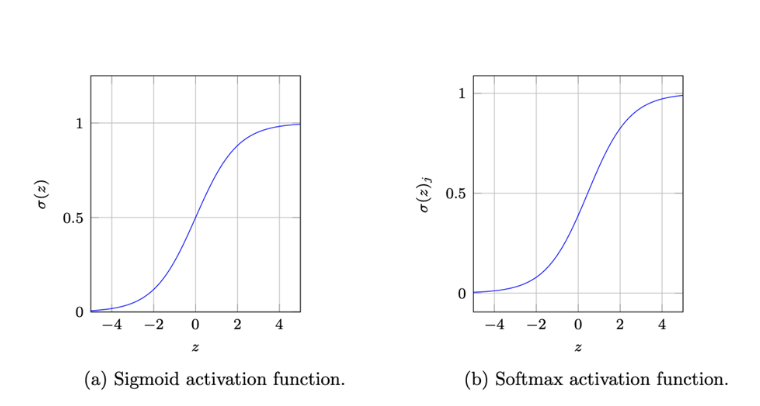

_Fuente: Nomidl:Difference between Sigmoid and Softmax activation function?_

Al igual que la funcion sigmoidea, la función softmax tiene la 'curva en forma de S', y su valor siempre se encuentra entre 0 y 1, por lo que se la implementa para resolver problemas categóricos que tienen mmás de dos valores posibles.


### El método de Máxima Versonilitud-MLE

Al igual que en la regresión logística simple, el modelo logit multinomial, también utiliza el método de máxima verosimilitud, donde la primera iteración es un modelo sin regresores, solo el intercepto, la siguiente iteración incluye 1 regresor en el modelo, y los regresores se cambian en cada iteración. De esta forma, las iteraciones continuarán hasta que el modelo converja. 

### Ajuste del modelo

En el modelo de Regresión Logística analizaremos los p-values para evaluar si el modelo es mejor que un modelo sin predictores, sólo con β0. Para ello, nos basaremos en el likelihood ratio, que es el que Python utiliza por defecto.

El likelihood ratio usa la diferencia entre la probabilidad de obtener los valores observados con el modelo logístico y las probabilidades de hacerlo con un modelo sin relación entre las variables calculando la significancia de la diferencia de residuos entre el modelo con predictores y el modelo nulo. El estadístico tiene una distribución chi-cuadrado con grados de libertad equivalentes a la diferencia de grados de libertad de los dos modelos comparados. Si se compara respecto al modelo nulo, los grados de libertad equivalen al número de predictores del modelo generado. 

# Supuestos del modelo de Regresión Logística Multinomial

Similar a la regresión logistica, la regresión logística multinomial comparte los supuestos de su versión binaria:

### 1. Variable dependiente categórica 

Como se mencionó al inicio, la regresión logística multinomial es para problemas de clasificación, por lo que necesitamos asegurarnos de que la variable objetivo sea categórica y que no presente ningún orden inherente.

#### Formas de verificación

- La forma más sencilla de verificar el supuesto, es comprobando que en nuestra base de datos la variable "Y" sea categórica, o de tipo "object". 

#### Posibles soluciones

Para dar solución a este supuesto, lo mejor es recodificar nuestra variable dependiente mediante LabelEncoder() utilizado en el anterior script.

### 2. Relación lineal entre el logaritmo natural de odds y la variable continua

El modelo logístico requiere que las variables independientes están linealmente relacionadas con las probabilidades logarítmicas, patrones en forma de U son una clara violación de esta condición.

Importante: La Regresión Logística no requiere que la variable independiente presente una distribución normal.

### 3. No colinealidad perfecta entre las covariables  

Aunque encontrar multicolinealidad perfecta es bastante extraño, lo que generalmente implica es que existe duplicidad de variables explicativas en el modelo. También puede ser el caso que existe una segunda variable derivada de la primera más una constante. 

El problema de la multicolinearidad perfecta es que implica estimadores indeterminados y una varianza infinita de los estimadores.

$$ var \hat{\beta} = inf $$

Lo cierto es que es más común en la práctica encontrarnos con situaciones donde exista multicolinearidad no perfecta que provoque errores elevados y de acuerdo con (Gujarati, 2007, p.329) estadísticos pequeños que llevan a no rechazar la hpótesis nula, lo que incrementaría la probabilidad de cometer errores de tipo II.


En sí el problema de violar este supuesto es que obtiene estimadores menos precisos y muy sensibles a cambios en los datos.

#### Formas de verificación

Existe una herramienta llamada Factor de inflación de la varianza-VIF la cual devuelve un valor conforme al nivel de asociación de las variables predictoras ( mide la correlación y la fuerza de la correlación ). Los rangos a tomar en cuenta del VIF son los siguientes:

$$ \textrm{VIF}_i = \frac{1}{1-R_i^2}$$

#### Posibles soluciones

- Verificar que no exista duplicidad entre variables

- Retirar uno de los pares de variables que presente el mayor VIF e ir trabajando uno a uno hasta que el VIF se estabilice

### 4. Grandes tamaños de muestra 

Se espera que el modelo de regresión logística sea construído con tamaños de muestra bastante grandes, aunque dependiendo de los resultados del modelo, este supuesto puede ser relajado.

Comencemos!


## La base a importar

El día de hoy analizaremos un caso de "Churn", o cómo clasificar a los clientes en función de si permanecen en la empresa, se afiliaron o la abandonaron. Por lo tanto, son modelos predictivos que calculan la tasa de abandono de los clientes.

Esta base, contiene información sobre 7043 clientes de una empresa de telecomunicaciones en California en el segundo trimestre de 2022 en formato .csv.
Cada registro representa a un cliente y contiene detalles sobre sus datos demográficos, ubicación, permanencia, servicios de suscripción, estado en el trimestre (afiliado, permanente o cancelado) ¡y más!. Además tiene un puntaje de 10, por lo que nos ayudará a tener resultados muy significativos.

Para descargarla, pueden dirigirse directamente a: https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics o descargarla del aula virtual.


### Importar los modules requeridos

In [790]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [791]:
import warnings
warnings.filterwarnings("ignore")

Para la regresión y validación de supuestos llamamos a statsmodel, el módulo encargado de la notación de fórmula.

In [792]:
import statsmodels.api as sm
import statsmodels.formula.api as sms

Ahora,  llamemos a nuestras bases de datos a nuestro espacio en el Jupyer Notebook:

In [919]:
df=pd.read_csv("telecom_customer_churn.csv")
df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


Perfecto!, lo primero que haremos es recodificar el nombre de las columnas al español.

#### Recodificar el nombre de las columnas a español

In [920]:
df.columns=['id_consumidor', 'genero', 'edad', 'casado', 'num_dependientes', 'ciudad', 'zip_code', 'latitud', 'longitud', 
 'num_referencias', 'antiguedad_meses', 'oferta', 'servicio_telefonico', 'cargos_larga_distancia', 'lineas_multiples',
 'servicio_internet', 'tipo_internet', 'gigas_promedio_descargas', 'seguridad_online', 'respaldo_online', 
 'plan_proteccion_equipo', 'soporte_tech_premium', 'servicio_tv', 'servicio_peliculas', 'servicio_musica', 
 'datos_ilimitados', 'contrato', 'factura_fisica', 'tipo_pago', 'cargo_mensual', 'cargos_totales', 'total_reembolsos',
 'total_extra_cargos', 'total_larga_distancia_cargos', 'total_ingreso', 'estado_consumidor', 'categoria_churn', 
 'razon_churn']

#### Estadísticos de resumen de nuestra base de clientes

In [921]:
df.describe()

,edad,num_dependientes,zip_code,latitud,longitud,num_referencias,antiguedad_meses,cargos_larga_distancia,gigas_promedio_descargas,cargo_mensual,cargos_totales,total_reembolsos,total_extra_cargos,total_larga_distancia_cargos,total_ingreso
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


#### Comentarios repecto a alguna variable?

Como podemos observar tenemos un total de 15 columnas numéricas, algunas de ellas sin mucho valor predictivo como:el id_del cliente, el código postal y las coordenadas contenidas en longitud y latitud.

Del método .describe() podemos observar que en las columnas de los totales, el valor mínimo es cero, analicemos estas columnas a mayor profundidad: 

In [922]:
pd.DataFrame(df.total_reembolsos.value_counts(normalize=True).round(2))

,total_reembolsos
0.00,0.93
16.56,0.00
8.74,0.00
1.31,0.00
41.74,0.00
...,...
31.90,0.00
12.07,0.00
37.37,0.00
48.59,0.00


In [923]:
pd.DataFrame(df.total_extra_cargos.value_counts(normalize=True).round(2))

,total_extra_cargos
0,0.90
10,0.02
40,0.01
30,0.01
20,0.01
80,0.01
100,0.01
50,0.01
150,0.01
130,0.01


In [924]:
pd.DataFrame(df.total_larga_distancia_cargos.value_counts(normalize=True).round(2))

,total_larga_distancia_cargos
0.00,0.1
15.60,0.0
48.96,0.0
22.86,0.0
597.60,0.0
...,...
200.75,0.0
217.62,0.0
2288.43,0.0
1417.68,0.0


De la exploración visual de cada una de las variables podemos notar que en los totales, predomina el valor cero, de hecho es su gran mayoría, por lo que podemos binarizar estas columnas para que entren en el modelo de una forma más elegante y no como una variable numérica.

#### Binarización de los totales

In [925]:
df.total_reembolsos             = np.where(df.total_reembolsos == 0,'no','si')
df.total_extra_cargos           = np.where(df.total_extra_cargos == 0,'no','si')
df.total_larga_distancia_cargos = np.where(df.total_larga_distancia_cargos == 0,'no','si')

Perfecto! comprobemos que efctivamente estas variables hayan sido recodificadas a variables categóricas:

In [926]:
df.dtypes

id_consumidor                    object
genero                           object
edad                              int64
casado                           object
num_dependientes                  int64
ciudad                           object
zip_code                          int64
latitud                         float64
longitud                        float64
num_referencias                   int64
antiguedad_meses                  int64
oferta                           object
servicio_telefonico              object
cargos_larga_distancia          float64
lineas_multiples                 object
servicio_internet                object
tipo_internet                    object
gigas_promedio_descargas        float64
seguridad_online                 object
respaldo_online                  object
plan_proteccion_equipo           object
soporte_tech_premium             object
servicio_tv                      object
servicio_peliculas               object
servicio_musica                  object


### Datos perdidos


Recordemos que una regla básica para eliminar valores perdidos u observaciones que se encuentren erróneas es basándonos en:

- Siempre es mejor conservar los datos que descartarlos. Como regla general, se puede descartar variables si los datos faltantes corresponden a más del 60% de las observaciones, siempre teniendo en cuenta que la imputación es preferida sobre la eliminación de variables

Existen 3 categorías de datos perdidos:

   - Falta al azar (MAR): Cuando la propensión a que falte un punto de datos no está relacionado con los datos faltantes, pero sí con algunos de los datos observados.
   
   
   - Missing Completely at Random (MCAR): Cuando el missing value no tiene nada que ver con su valor hipotético y con los valores de otras variables
   
   
   - Missing not at Random (MNAR): Cuando los missing values dependen del valor hipotético (por ejemplo, las personas con salarios altos generalmente no quieren revelar sus ingresos en las encuestas) o cuando los missing values dependen del valor de alguna otra variable (por ejemplo, cuando en encuestas las mujeres no quieren revelar su edad. Aquí, el valor que falta en la variable de edad se ve afectado por la variable de género)


En los primeros dos casos, es seguro eliminar los datos con valores faltantes dependiendo de sus ocurrencias, mientras que en el tercer caso, eliminar las observaciones con valores faltantes puede producir un sesgo en el modelo. Así que tenemos que tener mucho cuidado antes de eliminar las observaciones.

Exploremos en nuestra base si existen valores perdidos:

In [927]:
df.isna().sum()

id_consumidor                      0
genero                             0
edad                               0
casado                             0
num_dependientes                   0
ciudad                             0
zip_code                           0
latitud                            0
longitud                           0
num_referencias                    0
antiguedad_meses                   0
oferta                             0
servicio_telefonico                0
cargos_larga_distancia           682
lineas_multiples                 682
servicio_internet                  0
tipo_internet                   1526
gigas_promedio_descargas        1526
seguridad_online                1526
respaldo_online                 1526
plan_proteccion_equipo          1526
soporte_tech_premium            1526
servicio_tv                     1526
servicio_peliculas              1526
servicio_musica                 1526
datos_ilimitados                1526
contrato                           0
f

Las últimas dos columnas parece que sobrepasan el umbral de tolerancia de valores perdidos, asi que comencemos el análisis con ellas, para ello calculemos el porcentaje de los valores perdidos en el dataframe.

In [928]:
(df.isna().sum()/len(df)).round(2)

id_consumidor                   0.00
genero                          0.00
edad                            0.00
casado                          0.00
num_dependientes                0.00
ciudad                          0.00
zip_code                        0.00
latitud                         0.00
longitud                        0.00
num_referencias                 0.00
antiguedad_meses                0.00
oferta                          0.00
servicio_telefonico             0.00
cargos_larga_distancia          0.10
lineas_multiples                0.10
servicio_internet               0.00
tipo_internet                   0.22
gigas_promedio_descargas        0.22
seguridad_online                0.22
respaldo_online                 0.22
plan_proteccion_equipo          0.22
soporte_tech_premium            0.22
servicio_tv                     0.22
servicio_peliculas              0.22
servicio_musica                 0.22
datos_ilimitados                0.22
contrato                        0.00
f

Correcto, tenemos 73% de las observaciones faltantes en las dos últimas columnas, conforme a la teoría, deberíamos eliminarlas en su totalidad. Sin embargo antes de tomar esta posición, exploremos sus contenidos para analizar si deberíamos removerlas del modelo.

In [929]:
df.razon_churn.value_counts()

Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: razon_churn, d

In [930]:
df.categoria_churn.value_counts()

Competitor         841
Dissatisfaction    321
Attitude           314
Price              211
Other              182
Name: categoria_churn, dtype: int64

Después de analizar las variables, observamos que muy posiblemente contienen valores perdidos en las observaciones en las que el cliente se afilia o permanece en la empresa, por lo que no procederemos a eliminarlas. Verifiquemos esta hipótesis con el diccionario de variables en el link compartido: https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics

#### ¿Qué descubrieron del diccionario de variables para estas dos variables?            


Continuemos nuestro análisis con el segundo grupo con mayores valores perdidos,  aquellas que contienen un 22% de datos perdidos:

- tipo_internet
- gigas_promedio_descargas
- seguridad_online
- respaldo_online
- plan_proteccion_equipo
- soporte_tech_premium
- servicio_tv
- servicio_peliculas
- servicio_musica
- datos_ilimitados

Verifiquemos:


In [931]:
df[['tipo_internet' , 'gigas_promedio_descargas' , 'seguridad_online', 'respaldo_online' , 'plan_proteccion_equipo',
    'soporte_tech_premium', 'servicio_tv', 'servicio_peliculas', 'servicio_musica', 'datos_ilimitados']].isna().sum()

tipo_internet               1526
gigas_promedio_descargas    1526
seguridad_online            1526
respaldo_online             1526
plan_proteccion_equipo      1526
soporte_tech_premium        1526
servicio_tv                 1526
servicio_peliculas          1526
servicio_musica             1526
datos_ilimitados            1526
dtype: int64

In [932]:
df.servicio_internet.value_counts()

Yes    5517
No     1526
Name: servicio_internet, dtype: int64

Como podemos observar, todas las columnas extraídas en el análisis tienen el mismo número de "valores perdidos" que los clientes sin servicio de internet, por lo que concluímos que no son valores perdidos. 

En este caso imputaremos los valores aparentemente perdidos por una categoría que iluste que esos clientes no tienen el servicio de internet y por lo tanto tampoco servicios de streaming.

In [933]:
df.loc[:,['tipo_internet' , 'seguridad_online', 'respaldo_online' , 
    'plan_proteccion_equipo', 'soporte_tech_premium', 'servicio_tv', 'servicio_peliculas', 
    'servicio_musica', 'datos_ilimitados']]=\
df.loc[:,['tipo_internet' , 'seguridad_online', 'respaldo_online' , 
    'plan_proteccion_equipo', 'soporte_tech_premium', 'servicio_tv', 'servicio_peliculas', 
    'servicio_musica', 'datos_ilimitados']].replace(np.nan,'no_internet')

Ahora, para gigas_promedio_descargas, tengamos cuidado de transformar toda la columna en una categórica al imputar 'no_internet'. Es una variable netamente numérica, por lo que lo mejor será imputar esos valores perdidos con cero.

In [934]:
df.loc[:,'gigas_promedio_descargas']=df.loc[:,'gigas_promedio_descargas'].replace(np.nan, 0)

Verificamos:

In [935]:
df[['tipo_internet' , 'gigas_promedio_descargas' , 'seguridad_online', 'respaldo_online' , 'plan_proteccion_equipo',
    'soporte_tech_premium', 'servicio_tv', 'servicio_peliculas', 'servicio_musica', 'datos_ilimitados']].isna().sum()

tipo_internet               0
gigas_promedio_descargas    0
seguridad_online            0
respaldo_online             0
plan_proteccion_equipo      0
soporte_tech_premium        0
servicio_tv                 0
servicio_peliculas          0
servicio_musica             0
datos_ilimitados            0
dtype: int64

Perfecto!, hemos logardo corregir los "valores perdidos" en 10 columnas, lo que nos deja con aquellas columnas con 10% de datos perdidos:
- cargos_larga_distancia 
- lineas_multiples                


In [936]:
df[['cargos_larga_distancia' , 'lineas_multiples']].isna().sum()

cargos_larga_distancia    682
lineas_multiples          682
dtype: int64

In [937]:
df.servicio_telefonico.value_counts()

Yes    6361
No      682
Name: servicio_telefonico, dtype: int64

El comportamiento se vuelve a repetir, de las columnas extraídas en el análisis, 682 valores aparentemente perdidos coinciden con aquellos clientes que no disponen de serivicio telefónico, por lo que concluímos que no son valores perdidos.

Al igual que en el caso anterior, imputaremos los 682 valores aparentemente perdidos por una categoría que iluste que esos clientes no tienen el servicio de telefónico y por lo tanto tampoco cargos en llamadas a larga distancia y cargos por tener múltiples líneas telefónicas, en este último tengamos cuidado de transformar toda la columna, en una categórica al imputar 'no_servicio_telefonico'. Esta es una variable netamente numérica, por lo que lo mejor será imputar esos valores perdidos con cero.

In [938]:
df.loc[:,'lineas_multiples']=df.loc[:,'lineas_multiples'].replace(np.nan,'no_servicio_telefonico')

In [939]:
df.loc[:,'cargos_larga_distancia']=df.loc[:,'cargos_larga_distancia'].replace(np.nan, 0)

Verificamos:

In [940]:
df[['cargos_larga_distancia' , 'lineas_multiples']].isna().sum().isna().sum()

0

Perfecto! hemos manejado satisfactoriamente aquellas columnas que presentaban valores perdidos. El siguiente paso consiste en graficar nuestras variables para conocer más a fondo nuestro dataset.

### Remoción de variables

Antes de obtener la correlación de variables, vamos a eliminar de nuestro análisis a 4 columnas que llamaron la atención, estas son: id_consumidor, ciudad,  zip_code, latitud y longitud.
Dado que estas variables individualmente tienen poco valor explicativo y serían muy difíciles de interpretar en el modelo, además de ser una fuente de posible violación de los supuestos, procedemos a retirarlas.

In [941]:
df.ciudad.value_counts()

Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Johannesburg          2
South Lake Tahoe      2
Jacumba               2
Holtville             2
Eldridge              2
Name: ciudad, Length: 1106, dtype: int64

In [942]:
df.id_consumidor.value_counts()

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: id_consumidor, Length: 7043, dtype: int64

In [943]:
df.drop(['id_consumidor', 'zip_code','latitud','longitud','ciudad'],axis=1, inplace=True)

### Variables numéricas

#### Correlaciones entre las variables

In [944]:
df.corr().style.background_gradient(cmap='coolwarm')

,edad,num_dependientes,num_referencias,antiguedad_meses,cargos_larga_distancia,gigas_promedio_descargas,cargo_mensual,cargos_totales,total_ingreso
edad,1.000000,-0.119000,-0.025141,0.009927,-0.011749,-0.376595,0.134511,0.059684,0.048265
num_dependientes,-0.119000,1.000000,0.278003,0.108237,-0.007324,0.129966,-0.125649,0.022535,0.038038
num_referencias,-0.025141,0.278003,1.000000,0.326975,0.006336,0.038575,0.026301,0.250378,0.261853
antiguedad_meses,0.009927,0.108237,0.326975,1.000000,0.014596,0.049119,0.239065,0.826074,0.853146
cargos_larga_distancia,-0.011749,-0.007324,0.006336,0.014596,1.000000,-0.030455,0.130087,0.069500,0.232291
gigas_promedio_descargas,-0.376595,0.129966,0.038575,0.049119,-0.030455,1.000000,0.372776,0.223268,0.180726
cargo_mensual,0.134511,-0.125649,0.026301,0.239065,0.130087,0.372776,1.000000,0.622810,0.563249
cargos_totales,0.059684,0.022535,0.250378,0.826074,0.069500,0.223268,0.622810,1.000000,0.972212
total_ingreso,0.048265,0.038038,0.261853,0.853146,0.232291,0.180726,0.563249,0.972212,1.000000


De la matriz de correlaciones, podemos observar que aquellas variables que mayor correlación entre sí son: cargos_totales con   antiguedad_meses, cargos_totales con cargo_mensual, y cargo_mensual con total_ingreso.

A diferencia de la regresón lineal donde buscábamos incluír las variables con mayor correlación con la variable dependiente, en el presente modelo, la matriz de correlación nos da luces sobre las variables que podrían tener problemas de multicolinearidad. Recordemos que como nuestra variable objetivo es categórica, no se despliega en la matriz de correlación de Pearson.

In [945]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

''

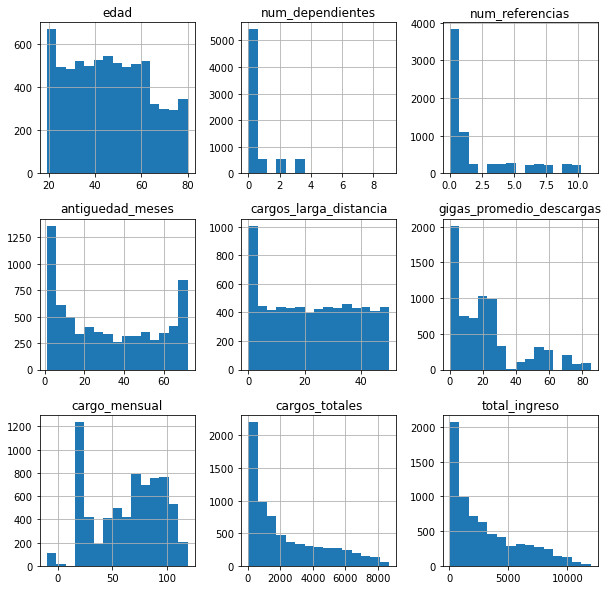

In [946]:
df[var_cuantitativas].hist(bins = 15, figsize = (10,10))
;

Dado que en la columna de cargos mensuales existen valores negativos, procedemos a eliminar estas observaciones del análisis ya que existe una columna específica para reembolsos por lo que estas observaciones son errores, (no hay cargos negativos). 

In [947]:
df = df[df['cargo_mensual'] >= 0]

### Variables categóricas

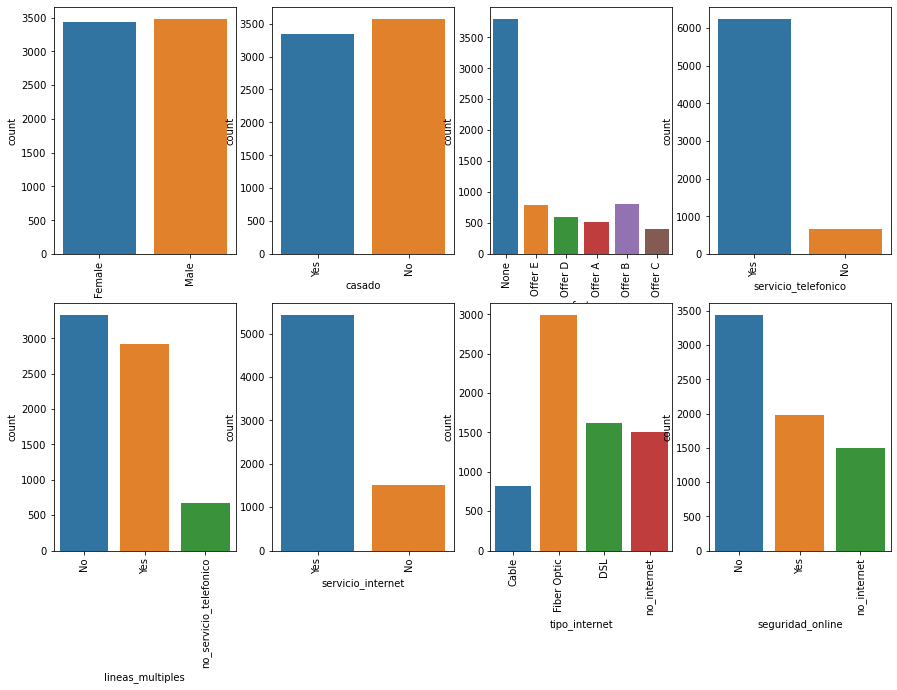

In [948]:
#For plotting multiple category columns at once
fig, ax = plt.subplots(2,4,figsize = (15,10))
for variable, subplot in zip(var_cualitativas, ax.flatten()):
    sns.countplot(df[variable], ax = subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

### Análisis de valores extremos

Como uno de los supuestos es justamente que no haya valores atípicos influyentes, repliquemos el tratamiento a las variables de precio y área del script anterior.

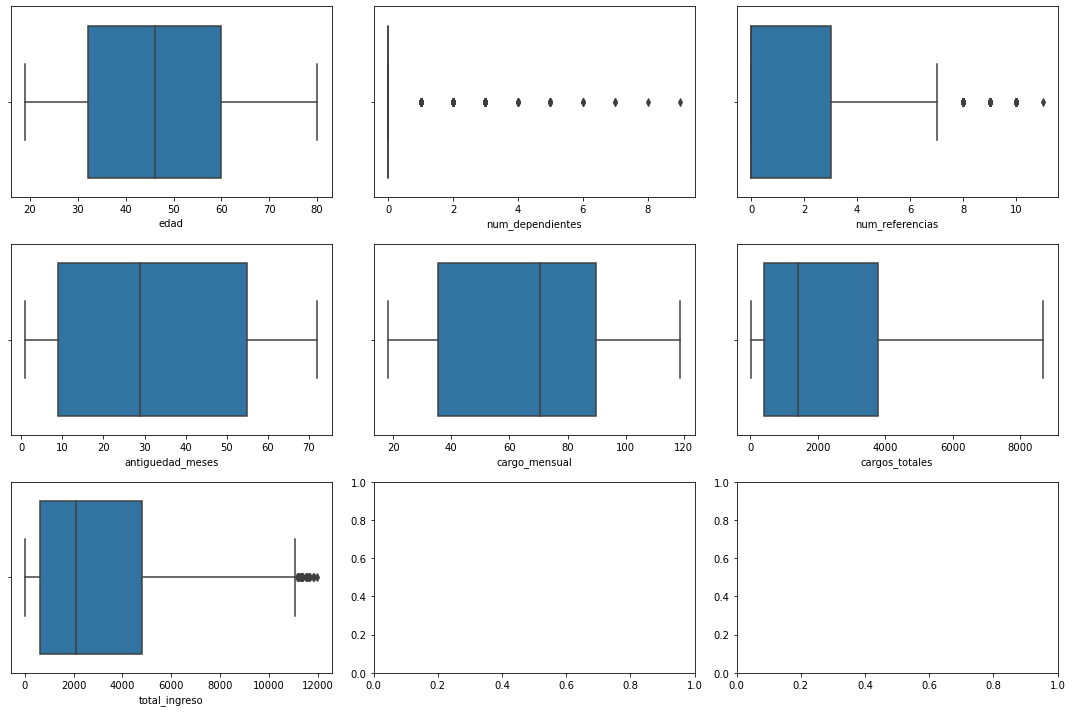

In [949]:
# Box plots
fig, axs = plt.subplots(3,3, figsize = (15,10))
plt1 = sns.boxplot(df['edad'], ax = axs[0,0])
plt2 = sns.boxplot(df['num_dependientes'], ax = axs[0,1])
plt3 = sns.boxplot(df['num_referencias'], ax = axs[0,2])
plt1 = sns.boxplot(df['antiguedad_meses'], ax = axs[1,0])
plt2 = sns.boxplot(df['cargo_mensual'], ax = axs[1,1])
plt3 = sns.boxplot(df['cargos_totales'], ax = axs[1,2])
plt3 = sns.boxplot(df['total_ingreso'], ax = axs[2,0])

plt.tight_layout()

De los box plots, a la única variable a la que le vamos a aplicar el tratamiento de valores extremos es a la variable de ingreso. Descartamos de esta forma a las variables: num_dependientes y num_referencias dado que son variables discretas numéricas.

### Tratamiento a la variable independiente "total_ingreso"

Del diccionario de variables, se especifica que la variable de ingresos totales se calcula al final de cada trimestre y se obtiene mediante: Total Charges - Total Refunds + Total Extra Data Charges + Total Long Distance Charges

In [950]:
df.total_ingreso.value_counts()

66.56      3
116.27     3
68.41      3
118.89     2
118.98     2
          ..
789.99     1
355.82     1
5419.35    1
8414.43    1
3707.60    1
Name: total_ingreso, Length: 6859, dtype: int64

In [951]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.total_ingreso.quantile(0.25)
Q3 = df.total_ingreso.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

4204.594999999999


In [952]:
df.shape

(6923, 33)

In [953]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['total_ingreso'] < (Q1 - 1.5 * IQR)) |(df['total_ingreso'] > (Q3 + 1.5 * IQR)))]
df.shape

(6902, 33)

<AxesSubplot:xlabel='total_ingreso', ylabel='Density'>

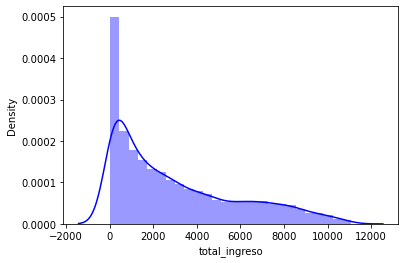

In [954]:
sns.distplot(df['total_ingreso'],color="blue")

Listo, del gráfico de distribución podemos observar que existe un pico en observaciones marcadas cen la primera sección . Al comparar con el diccionario de variables, se explica que esta columna se obtiene de la sumatoria de cargos y reembolsos, por lo que las ganancias por cada cliente tienen un pico en la primera sección concentrando a los clientes altos en un porcentaje menor que los clientes con ganancias pequeñas.

El siguiente paso en el tratamiento de las variables, es la recodificación de las variables cualitativas de forma numérica para que el modelo de regresión logística pueda cuantificar su incidencia en la variable dependiente de mejor manera.
Para ello, vamos a seguir un proceso para dumificar las variables categóricas con la ayuda del module de pandas.

### Recodificación de las variables

Antes de recodificar a nuestra variable objetivo, comprobemos que es una variable categórica sin un orden inherente y con más de dos niveles:

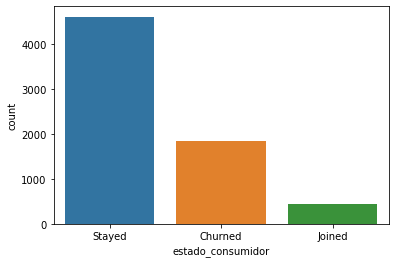

In [955]:
sns.countplot(df.estado_consumidor);

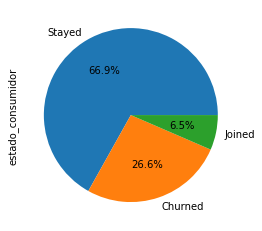

In [956]:
df.estado_consumidor.value_counts().plot(kind='pie', autopct='%1.1f%%');

Del análisis gráfico observamos que los clientes en el trimestre analizado se concentraron en la sección de permanencia, 6.5% de ellos ingresaron a la empresa como clientes y 26.6% abandonaron a la telefónica.

#### Me pueden indicar 2 datos importantes con respecto a nuestra variable objetivo y cuáles son las principales causas de que un cliente abanone a esta companía?

In [957]:
 df2 = df.loc[df.estado_consumidor != 'Joined']

[Text(0.5, 0, ''), Text(0, 0.5, '')]

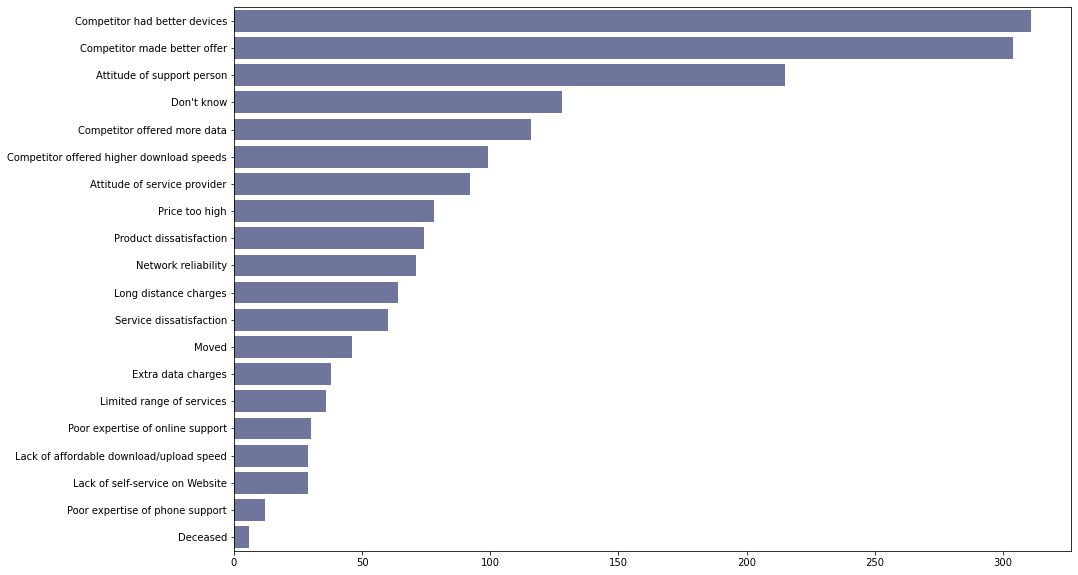

In [959]:
fig = plt.figure(figsize = (15, 10))
ax = sns.countplot(data = df2, y = df2.razon_churn, order = df2.razon_churn.value_counts().index , color = '#676FA3')
ax.set(xlabel = None, ylabel = None)

 Perfecto, el siguiente paso es recodificar todas nuestras variables que no sean numéricas. Para ello utilizaremos el module LabelEncoder.

In [831]:
df[var_cualitativas]

,genero,casado,oferta,servicio_telefonico,lineas_multiples,servicio_internet,tipo_internet,seguridad_online,respaldo_online,plan_proteccion_equipo,...,datos_ilimitados,contrato,factura_fisica,tipo_pago,total_reembolsos,total_extra_cargos,total_larga_distancia_cargos,estado_consumidor,categoria_churn,razon_churn
0,Female,Yes,None,Yes,No,Yes,Cable,No,Yes,No,...,Yes,One Year,Yes,Credit Card,no,no,si,Stayed,NaN,NaN
2,Male,No,Offer E,Yes,No,Yes,Fiber Optic,No,No,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,no,no,si,Churned,Competitor,Competitor had better devices
3,Male,Yes,Offer D,Yes,No,Yes,Fiber Optic,No,Yes,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,no,no,si,Churned,Dissatisfaction,Product dissatisfaction
4,Female,Yes,None,Yes,No,Yes,Fiber Optic,No,No,No,...,Yes,Month-to-Month,Yes,Credit Card,no,no,si,Churned,Dissatisfaction,Network reliability
5,Female,No,Offer E,Yes,No,Yes,Cable,No,No,No,...,Yes,Month-to-Month,Yes,Credit Card,no,no,si,Stayed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,Offer D,Yes,No,Yes,DSL,Yes,No,No,...,Yes,One Year,No,Credit Card,no,no,si,Stayed,NaN,NaN
7039,Male,Yes,Offer D,Yes,Yes,Yes,Fiber Optic,No,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,no,no,si,Churned,Dissatisfaction,Product dissatisfaction
7040,Male,No,Offer E,Yes,No,Yes,DSL,No,Yes,No,...,Yes,Month-to-Month,Yes,Credit Card,no,no,si,Joined,NaN,NaN
7041,Male,Yes,Offer A,Yes,No,Yes,Cable,Yes,No,Yes,...,Yes,Two Year,No,Credit Card,no,no,si,Stayed,NaN,NaN


In [832]:
from sklearn.preprocessing import LabelEncoder

In [833]:
# Creamos la instancia del objeto
labelencoder = LabelEncoder()

In [834]:
df[var_cualitativas]=df[var_cualitativas].apply(LabelEncoder().fit_transform)

In [835]:
df[var_cualitativas].dtypes

genero                          int32
casado                          int32
oferta                          int32
servicio_telefonico             int32
lineas_multiples                int32
servicio_internet               int32
tipo_internet                   int32
seguridad_online                int32
respaldo_online                 int32
plan_proteccion_equipo          int32
soporte_tech_premium            int32
servicio_tv                     int32
servicio_peliculas              int32
servicio_musica                 int32
datos_ilimitados                int32
contrato                        int32
factura_fisica                  int32
tipo_pago                       int32
total_reembolsos                int32
total_extra_cargos              int32
total_larga_distancia_cargos    int32
estado_consumidor               int32
categoria_churn                 int32
razon_churn                     int32
dtype: object

Una vez que tenemos nuestra base de datos en el estado deseado para la modelación, procedemos por fines explicativos a incluir todas las variables de categoría churn y la razon_churn que son  variables con mayor valor explicativo
fuera del modelo.


## El modelo de Regresión Logística multinomial en nuestra base de datos

In [904]:
regresion1 = sm.MNLogit.from_formula("estado_consumidor ~ genero + edad + casado + num_dependientes + num_referencias + \
                      antiguedad_meses + oferta + servicio_telefonico + cargos_larga_distancia + lineas_multiples + \
                      servicio_internet + tipo_internet + gigas_promedio_descargas + seguridad_online + respaldo_online +\
                      plan_proteccion_equipo + soporte_tech_premium + servicio_tv + servicio_peliculas + servicio_musica +\
                      datos_ilimitados + contrato + factura_fisica + tipo_pago + cargo_mensual + cargos_totales +\
                      total_reembolsos + total_extra_cargos + total_larga_distancia_cargos + total_ingreso ", data=df)

results1 = regresion1.fit()

Optimization terminated successfully.
         Current function value: 0.405905
         Iterations 13


En vista que la notación de fórmula, se está haciendo difícil de abordar, el día de hoy aprenderemos una nueva syntaxis, que se asemeja a la estructura que usaremos cuando obtengamos los modelos por sklearn.

Primero, tenemos que separar a las variables explicativas de nuestra variable objetivo:

In [869]:
X = df.drop(['estado_consumidor', 'categoria_churn', 'razon_churn'] , axis=1)
y = df.estado_consumidor

In [870]:
X = sm.add_constant(X, prepend = True)
X

,const,genero,edad,casado,num_dependientes,num_referencias,antiguedad_meses,oferta,servicio_telefonico,cargos_larga_distancia,...,datos_ilimitados,contrato,factura_fisica,tipo_pago,cargo_mensual,cargos_totales,total_reembolsos,total_extra_cargos,total_larga_distancia_cargos,total_ingreso
0,1.0,0,37,1,0,2,9,0,1,42.39,...,1,1,1,1,65.60,593.30,0,0,1,974.81
2,1.0,1,50,0,0,0,4,5,1,33.65,...,1,0,1,0,73.90,280.85,0,0,1,415.45
3,1.0,1,78,1,0,1,13,4,1,27.82,...,1,0,1,0,98.00,1237.85,0,0,1,1599.51
4,1.0,0,75,1,0,3,3,0,1,7.38,...,1,0,1,1,83.90,267.40,0,0,1,289.54
5,1.0,0,23,0,3,0,9,5,1,16.77,...,1,0,1,1,69.40,571.45,0,0,1,722.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,20,0,0,0,13,4,1,46.68,...,1,1,0,1,55.15,742.90,0,0,1,1349.74
7039,1.0,1,40,1,0,1,22,4,1,16.20,...,1,0,1,0,85.10,1873.70,0,0,1,2230.10
7040,1.0,1,22,0,0,0,2,5,1,18.62,...,1,0,1,1,50.30,92.75,0,0,1,129.99
7041,1.0,1,21,1,0,5,67,1,1,2.12,...,1,2,0,1,67.85,4627.65,0,0,1,4769.69


In [871]:
regresion_multinomial = sm.MNLogit(y, X)
results=regresion_multinomial.fit()

Optimization terminated successfully.
         Current function value: 0.405905
         Iterations 13


El default de Python son 35 iteraciones, si el modelo logístico no logra converger hasta ese punto, es probable que Python nos muestre un error. En nuestro ejercicio, vemos que Python a encontrado una solución después de 13 iteraciones.

In [872]:
print(results.summary())

                          MNLogit Regression Results                          
Dep. Variable:      estado_consumidor   No. Observations:                 6902
Model:                        MNLogit   Df Residuals:                     6842
Method:                           MLE   Df Model:                           58
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.4919
Time:                        21:24:02   Log-Likelihood:                -2801.6
converged:                       True   LL-Null:                       -5514.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
         estado_consumidor=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.2136      1.812     -0.670      0.503      -4.765       2.338
genero                           0.0544      0.145      0.375      0.708     

Como habíamos mencionado en la teoría, se calcularán tantos modelos como niveles-1 de las clases existan en la variable dependiente.

De los resultados obtenidos, podemos ver que algunos de los valores de p de las variables son mayores a 0.05, por lo que con la ayuda de el VIF eliminaremos aquellos predictores que presenten multicolinearidad.

## Verificación de los supuestos de la Regresión Logística Multinomial

Dado que contamos con una sola variable explicativa en este modelo de Regresión Lineal, los supuestos a verificar se centrarán en:

- Linealidad en los parámetros
    
- Normalidad en los residuos
    
- Homocedasticidad en los residuos


Adicionalmente, la regresión logística multinomial asume que las probabilidades de preferir una determinada clase sobre otra no dependen de la presencia o ausencia de otras alternativas, por lo que si tenemos un ejercicio en el que tenemos tres opciones, las probabilidades relativas de predecir la categoría A o B no cambian si se agrega otra opción D como posibilidad adicional.

### 1. Variable dependiente categórica

Para comprobar este supuesto podemos inspeccionar la base de datos y comprobar su tipo de dato, o graficar por medio de un barplot, la proporción de los niveles en nuestra variable objetivo.

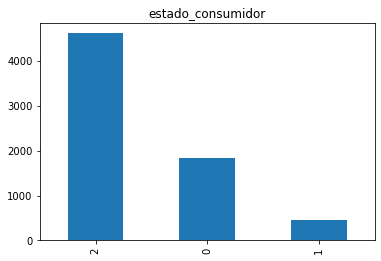

In [873]:
df.estado_consumidor.value_counts().plot(kind='bar', title="estado_consumidor")
plt.show()

Como observamos este supuesto se cumple dado que nuestra variable objetivo sólo tiene tres niveles.


### 3. No colinelidad perfecta ni semi-perfecta en los predictores

In [874]:
df.dtypes

genero                            int32
edad                              int64
casado                            int32
num_dependientes                  int64
num_referencias                   int64
antiguedad_meses                  int64
oferta                            int32
servicio_telefonico               int32
cargos_larga_distancia          float64
lineas_multiples                  int32
servicio_internet                 int32
tipo_internet                     int32
gigas_promedio_descargas        float64
seguridad_online                  int32
respaldo_online                   int32
plan_proteccion_equipo            int32
soporte_tech_premium              int32
servicio_tv                       int32
servicio_peliculas                int32
servicio_musica                   int32
datos_ilimitados                  int32
contrato                          int32
factura_fisica                    int32
tipo_pago                         int32
cargo_mensual                   float64


Ahora si, calculemos el VIF de nuestras vaibales para ver que tan correlacionadas están entre sí:

In [875]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [876]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data.sort_values(by=['VIF'], ascending=False ))

                         feature          VIF
8            servicio_telefonico          inf
29  total_larga_distancia_cargos          inf
0                          const  1432.685535
11             servicio_internet   153.818231
30                 total_ingreso    58.914920
26                cargos_totales    53.232261
21              datos_ilimitados    51.365334
25                 cargo_mensual    33.636466
28            total_extra_cargos    15.853323
19            servicio_peliculas    14.268664
20               servicio_musica    11.672592
6               antiguedad_meses     8.780049
12                 tipo_internet     7.692555
18                   servicio_tv     6.463520
17          soporte_tech_premium     4.847107
14              seguridad_online     4.729145
16        plan_proteccion_equipo     4.599559
15               respaldo_online     4.316054
9         cargos_larga_distancia     3.138632
10              lineas_multiples     3.051568
22                      contrato  

Como tenemos variables con una multicolinearidad que sobrepasa los rangos aceptables, en esta ronda procedemos a eliminar a las variables de: 
- servicio_telefonico
- total_larga_distancia_cargos 
- servicio_internet
- total_ingreso 
- cargos_totales 
- datos_ilimitados 
- cargo_mensual
- total_extra_cargos
- servicio_peliculas 
- servicio_musica 
- antiguedad_meses 
- tipo_internet 
- servicio_tv     

In [877]:
X2 = X.drop(['servicio_telefonico', 'total_larga_distancia_cargos', 'servicio_internet', 'total_ingreso', 'cargos_totales', 'datos_ilimitados',
             'cargo_mensual', 'total_extra_cargos', 'servicio_peliculas', 'servicio_musica',
             'antiguedad_meses', 'tipo_internet', 'servicio_tv'] , axis=1)

In [878]:
regresion_multinomial2 = sm.MNLogit(y, X2)
results2=regresion_multinomial2.fit()

Optimization terminated successfully.
         Current function value: 0.532275
         Iterations 8


El default de Python son 35 iteraciones, si el modelo logístico no logra converger hasta ese punto, es probable que Python nos muestre un error. En nuestro ejercicio, vemos que Python a encontrado una solución después de 8 iteraciones.

In [879]:
print(results2.summary())

                          MNLogit Regression Results                          
Dep. Variable:      estado_consumidor   No. Observations:                 6902
Model:                        MNLogit   Df Residuals:                     6866
Method:                           MLE   Df Model:                           34
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.3337
Time:                        21:24:07   Log-Likelihood:                -3673.8
converged:                       True   LL-Null:                       -5514.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
     estado_consumidor=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.6174      0.323      1.912      0.056      -0.015       1.250
genero                       0.0894      0.115      0.781      0.435      -0.135       0.

### 3. No colinelidad perfecta ni semi-perfecta en los predictores

In [880]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X2.columns
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(len(X2.columns))]

print(vif_data.sort_values(by=['VIF'], ascending=False ))

                     feature        VIF
0                      const  34.172889
13      soporte_tech_premium   3.738362
10          seguridad_online   3.537855
12    plan_proteccion_equipo   3.119836
11           respaldo_online   2.999815
3                     casado   1.955672
5            num_referencias   1.886856
9   gigas_promedio_descargas   1.847666
2                       edad   1.424776
14                  contrato   1.397068
8           lineas_multiples   1.268381
4           num_dependientes   1.220888
15            factura_fisica   1.153149
7     cargos_larga_distancia   1.140622
16                 tipo_pago   1.114033
6                     oferta   1.061249
17          total_reembolsos   1.007220
1                     genero   1.001300


Adicionalmente en esta tercera ronda, eliminaremos a las variables que en ambas regresiones logísticas no sean estadísticamente significativas: género

In [881]:
X3 = X2.drop(['genero'] , axis=1)

In [882]:
regresion_multinomial3 = sm.MNLogit(y, X3)
results3=regresion_multinomial3.fit()

Optimization terminated successfully.
         Current function value: 0.532321
         Iterations 8


In [883]:
print(results3.summary())

                          MNLogit Regression Results                          
Dep. Variable:      estado_consumidor   No. Observations:                 6902
Model:                        MNLogit   Df Residuals:                     6868
Method:                           MLE   Df Model:                           32
Date:                Tue, 18 Oct 2022   Pseudo R-squ.:                  0.3337
Time:                        21:24:22   Log-Likelihood:                -3674.1
converged:                       True   LL-Null:                       -5514.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
     estado_consumidor=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.6654      0.317      2.101      0.036       0.045       1.286
edad                        -0.0219      0.004     -5.024      0.000      -0.030      -0.


### Significancia del modelo

Para evaluar la calidad del modelo de regresión logística, podemos observar dos métricas en el resultado:

- El pseudo R^2, y
- el LLR p-value

#### El pseudo R^2

Este valor se puede considerar como el sustituto del valor de R^2 para un modelo de regresión lineal ya que al igual que en el último, oscila entre entre 0 y 1. (Los valores más altos indican un mejor ajuste del modelo) y se calcula como el cociente entre la función logarítmica de verosimilitud maximizada del modelo nulo y del modelo completo.




En este ejemplo, el valor pseudo R^2 es 0.33, que es medianamente bajo, sugiriéndonos que las variables predictoras en el modelo hacen un mediano trabajo al predecir el valor de la variable de respuesta.
Recordemos que este es un pseudo valor de R en la medida que un R^2 como tal no existe en el modelo logístico por lo que su valor debe ser interpretado con más cautela que el original.

#### El LLR p-value

Este valor se puede considerar como el sustituto del valor p para el valor F general de un modelo de regresión lineal.

Si este valor está por debajo de cierto umbral (por ejemplo, α = .05), entonces podemos concluir que el modelo en general es "útil" y es mejor para predecir los valores de la variable de respuesta en comparación con un modelo sin variables predictoras.



En este ejemplo, el valor p de LLR es de 0.000. por lo que podemos concluir que el modelo en su conjunto es útil.


### Interpretaciones

Para los resultados del modelo en statsmodel, debemos tener en cuenta que existen k-1 modelos que muestran los coeficientes contra un grupo de referencia. En nuestros resultados, y tomando como referencia a la clase 0, (que corresponde a aquellos clientes que permanecieron en la empresa) podemos interpretar los resultados como:

La interpretación de los coeficientes y tomando en cuenta el grupo de referencia 0, los coeficientes representarán al logaritmo de los cocientes entre dos probabilidades: la probabilidad de pertenecer al grupo de interés o el analizado vs. la probabilidad de pertenecer al grupo de referencia. 

Si el grupo de referencia son los clientes que permanecieron en la empresa, el primer modelo corresponde al primer conjunto de coeficientes marcados como aquellos clientes que hicieron churn o salieron de la empresa, por lo que el coeficiente de la primera variable explicativa en ese modelo:edad(-0.0219)se interpretaría como:

    "Aumentar la medida de edad en una unidad dará como resultado una disminución de 0.0219 unidades en el logaritmo de la relación entre la probabilidad de ser un cliente que abandone la empesa frente a la probabilidad de que el cliente que permanezca en la empresa. 
    
    -0.0219 significa enonces, que cuando los clientes pasan de ser clasificados como clientes que abandonan la empresa a clientes que permanecen en ella, los odds o razón de probabilidades es 0.0219 veces más baja y, por lo tanto, los clientes que hacen churn, tienden a ser de una edad más baja que los clientes que permanecen en la empresa. 
    
    En otras palabras, si el cliente aumentara su edad en una unidad, se esperaría que las probabilidades logarítmicas multinomiales de ser un cliente que permanece en la empresa frente a un cliente que abandonó la empresa disminuyeran en 0.0219 unidades mientras se mantienen constantes todas las demás variables "
    
    


Para las variables categóricas, tomemos el caso de la siguiente variable que contiene información de si el cliente es casado o no:

Para la variable de casado, la interpretación vendría dada por:

    "-2.6116 significa que cuando los clientes pasan de ser clientes que hacen churn a clientes que permanecen en la empresa,  la razón de probabilidades es 2.6116 veces más baja y, por lo tanto, los clientes que hacen churn en la empresa son aquellos que no se encuentran casados.
    
    
    En la misma línea, esta es la estimación logística multinomial que compara el hecho de que un cliente esté casado frente a no estarlo (mientras otras variables en el modelo se mantienen constantes), por lo que el logit multinomial para los clientes que se encuentran casados en relación a aquellos que no, es de 2.61160 unidades más bajo para aquellos clientes que permanecen en la empresa frente a los que abandonan la empresa, manteniendo todos los demás predictores del modelo constantes. 

    En palabras más sencillas, indica que los clientes casados tienen más probabilidad que los clientes que no lo están de quedarse en la empresa frente a aquellos que hicieron churn "





### Predicciones

Dado que un modelo logístico modela el logaritmo de Odds, estas son las unidades en las que se devuelven las predicciones. Para predecir, es necesario convertir las unidades en probabilidades mediante la función softmax.

En Python, la función predict() puede devolver directamente las probabilidades en lugar de los logOddss de la siguiente forma:

In [888]:
# performing predictions on the test datdaset
y_pred = results3.predict()

## Evaluación del modelo

#### Accuracy y Matriz de confusión

In [905]:
t = results3.pred_table()
print(t)
print("Accuracy:",np.diag(t).sum()/t.sum())


[[1339.   15.  484.]
 [ 158.   13.  277.]
 [ 643.   14. 3959.]]
Accuracy: 0.7694871051869023


El porcentaje de aciertos es del 77%. Esto nos dice que del total de observaciones en el modelo, el modelo predijo correctamente la clase correspondiente el 77 % de las veces.

A partir de los resultados, observamos que el modelo es capaz de clasificar correctamente 1339+13+3959/(1339+15+484+158+13+277+643+14+3959)=0.7686(77%) de las observaciones de entrenamiento. 

Si se analiza en detalle cómo se distribuye el error,la matriz de confusión muestra que: 324 y 77 fueron clasificados correctamente, mientras que el modelo categorizó incorrectamente un aproximadoo de 16% de las observaciones.


#### Conclusión

El modelo logístico creado para predecir la probabilidad de que un cliente haga churn tomando como referencia a aquellos clientes que permanecieron en la empresa, es en conjunto significativo acorde al Likelihood ratio (p-value = 0.000) y la matriz de confusión presenta resultados en la línea del accuracy por lo que se conluye que hemos llegado a un modelo válido.

### Próximos pasos: 

Excelente! 

Como siguientes pasos y para mejorar este modelo existen técnicas de balanceo que equiparen la proporción de las clases que tenemos enn nuestra variable objetivo, pero que son en gran medida más populares desde el lado del Machine Learning y que lo analizaremos en la semana No. 4
